In [1]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
#데이터셋 불러오기
iris_data = load_iris()

df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df['class'] = iris_data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

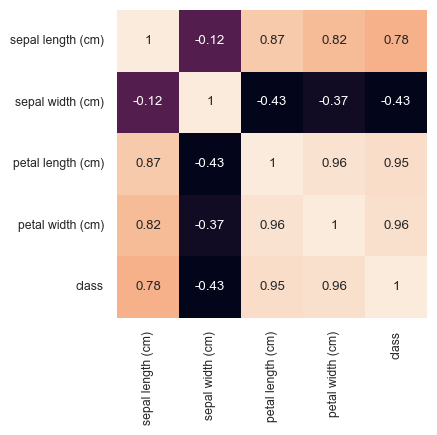

In [4]:

df_corr=df.corr()

#히트맵->상관관계 확인
plt.figure(figsize=(4,4))
sns.set(font_scale=0.8) 
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df.columns #다 가져다 쓰다보면 오타가 날 수 있으니, columns로 복사해서 가져오기

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [15]:
new_df=df[['petal length (cm)','petal width (cm)','sepal length (cm)']] #new_df에 선택한 피처들 저장
new_df

,petal length (cm),petal width (cm),sepal length (cm)
0,1.4,0.2,5.1
1,1.4,0.2,4.9
2,1.3,0.2,4.7
3,1.5,0.2,4.6
4,1.4,0.2,5.0
...,...,...,...
145,5.2,2.3,6.7
146,5.0,1.9,6.3
147,5.2,2.0,6.5
148,5.4,2.3,6.2


In [16]:
X = new_df.drop('sepal length (cm)',axis=1)
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
y = new_df['sepal length (cm)']
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 0.1439127962585447


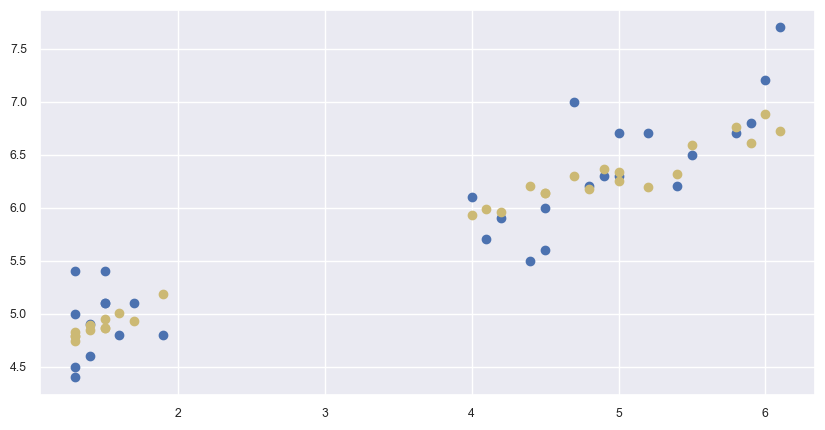

In [20]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length (cm)'], y_test, label='y_test')
plt.scatter(X_test['petal length (cm)'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()    

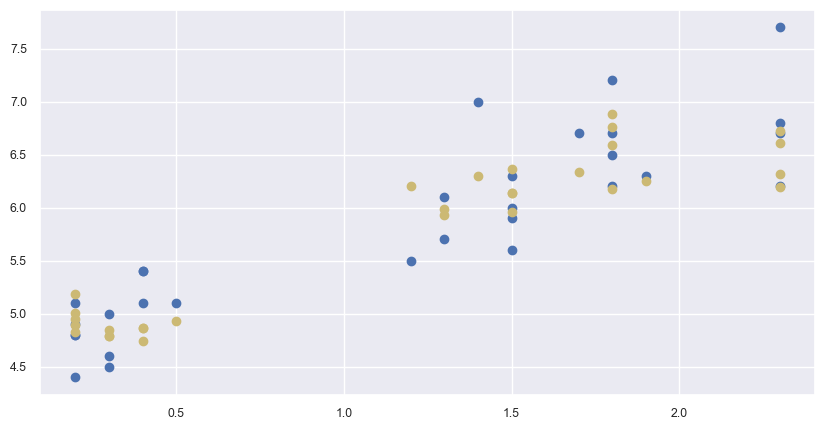

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['petal width (cm)'], y_test, label='y_test')
plt.scatter(X_test['petal width (cm)'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 